# 상관분석 & EDA

> 인구데이터 결합 (분석프로세스 참고)

> 하수처리장 결합

> 가축분뇨수진운반업 결합
---
> EDA
- 농가수 대비 두수
- 농가수 대비 처리시설 개수
- 읍면동별_농가수 는 EDA용
- 면적대비 파생변수를 만들어 모델링용 변수 생성

> 상관분석
---
> 모델링

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
plt.rc('font', family='Malgun Gothic')
plt.style.use('ggplot')

In [3]:
os.listdir()

['(old)상관분석.ipynb',
 '(최종)상관분석 및 EDA.ipynb',
 '.ipynb_checkpoints',
 'EDA.ipynb',
 'merge2020.ipynb',
 '독립변수_v2.ipynb',
 '심층분석지역 구축.ipynb',
 '읍면동별 대기오염도.ipynb',
 '환경부_전처리.ipynb']

In [4]:
df = pd.read_excel('basic.xlsx')
df

,시도,시군,읍면동,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),...,두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
0,서울특별시,종로구,청운효자동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0
1,서울특별시,종로구,종로1.2.3.4가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0
2,서울특별시,종로구,종로5.6가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0
3,서울특별시,종로구,창신제1동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0
4,서울특별시,종로구,창신제2동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,제주특별자치도,서귀포시,송산동,4078.447,164.403114,158.053846,15.173917,0.0,7.0,5.56736,...,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0
4119,제주특별자치도,서귀포시,동홍동,4078.447,164.403114,158.053846,15.173917,NaN,2.0,0.53280,...,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0
4120,제주특별자치도,서귀포시,천지동,NaN,164.403114,158.053846,15.173917,0.0,6.0,6.31259,...,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0
4121,제주특별자치도,서귀포시,서홍동,NaN,164.403114,158.053846,15.173917,NaN,6.0,6.31259,...,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0


# 1. 종속변수 선정- 상관분석

## 1-1. 시군 기준으로 groupby

In [5]:
df_cor = df[['수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도', '시도', '시군', '읍면동',
       '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수']].groupby(by=['시도']).sum().corr()

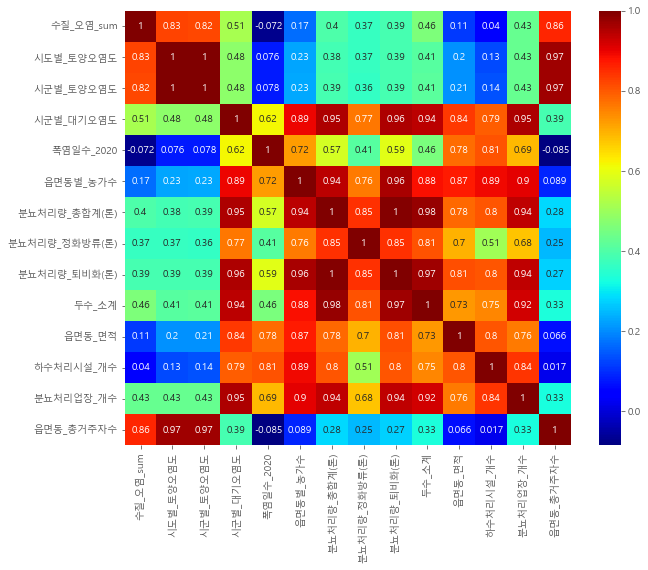

In [6]:
plt.figure(figsize=[10,8])

sns.heatmap(df_cor, annot=True, cmap=plt.cm.jet)
plt.show()

In [7]:
abs(df_cor.iloc[:4,4:]).sum(axis=1)

수질_오염_sum    3.285493
시도별_토양오염도    3.587231
시군별_토양오염도    3.604340
시군별_대기오염도    8.099417
dtype: float64

In [8]:
df_cor.iloc[:4,4:]

,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
수질_오염_sum,-0.071960,0.165773,0.397630,0.365520,0.386696,0.457648,0.113598,0.040129,0.428211,0.858328
시도별_토양오염도,0.076268,0.228633,0.384039,0.367179,0.387124,0.410560,0.204796,0.130287,0.428336,0.970011
시군별_토양오염도,0.078373,0.232507,0.385807,0.363965,0.388783,0.411650,0.205750,0.137970,0.431506,0.968028
시군별_대기오염도,0.615339,0.894591,0.953729,0.766268,0.956011,0.941598,0.835090,0.794621,0.953522,0.388647


In [9]:
df[['수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도']].isna().sum()

수질_오염_sum    3355
시도별_토양오염도      74
시군별_토양오염도      74
시군별_대기오염도    1966
dtype: int64

In [10]:
len(df)

4123

In [13]:
df['시군별_대기오염도'].isna().sum()

1966

## 2-1. 시도별 대기오염도 merge

In [14]:
대기오염 = pd.read_excel('./Data/독립변수_v3/대기오염도.xlsx')
대기오염

,시도,시군,이산화질소_2020_MEAN,미세먼지_2020_MEAN,아황산가스_2020_MEAN
0,서울특별시,서울특별시,0.023833,20.750000,0.003083
1,부산광역시,부산광역시,0.016167,16.916667,0.003500
2,대구광역시,대구광역시,0.016917,20.000000,0.002333
3,인천광역시,인천광역시,0.020333,18.083333,0.003750
4,광주광역시,광주광역시,0.014000,18.000000,0.002750
...,...,...,...,...,...
157,경상남도,의령군,0.008583,15.083333,0.002667
158,경상남도,창녕군,0.013417,18.666667,0.003333
159,경상남도,합천군,0.008583,14.416667,0.002667
160,제주특별자치도,제주특별자치도,0.011417,15.666667,0.001833


In [15]:
대기오염 = 대기오염.groupby(by='시도').mean()
대기오염

,이산화질소_2020_MEAN,미세먼지_2020_MEAN,아황산가스_2020_MEAN
시도,,,
강원도,0.009417,16.829966,0.002468
경기도,0.019231,20.919355,0.003097
경상남도,0.012236,15.810185,0.003000
경상북도,0.009832,16.634387,0.003378
광주광역시,0.014000,18.000000,0.002750
대구광역시,0.016917,20.000000,0.002333
대전광역시,0.017333,17.416667,0.002250
부산광역시,0.016167,16.916667,0.003500
서울특별시,0.023833,20.750000,0.003083


In [16]:
대기오염['대기오염도_sum'] = 대기오염.sum(axis=1)
대기오염.head()

,이산화질소_2020_MEAN,미세먼지_2020_MEAN,아황산가스_2020_MEAN,대기오염도_sum
시도,,,,
강원도,0.009417,16.829966,0.002468,16.841851
경기도,0.019231,20.919355,0.003097,20.941683
경상남도,0.012236,15.810185,0.003000,15.825421
경상북도,0.009832,16.634387,0.003378,16.647597
광주광역시,0.014000,18.000000,0.002750,18.016750


In [17]:
df['시도'].unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도', '세종특별자치시'], dtype=object)

In [18]:
대기오염.reset_index(inplace=True)

In [19]:
대기오염 = 대기오염[['시도','대기오염도_sum']]

In [20]:
df = pd.merge(df, 대기오염, on='시도', how='left')
df.head()

,시도,시군,읍면동,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),...,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,대기오염도_sum
0,서울특별시,종로구,청운효자동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0,20.776917
1,서울특별시,종로구,종로1.2.3.4가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0,20.776917
2,서울특별시,종로구,종로5.6가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0,20.776917
3,서울특별시,종로구,창신제1동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0,20.776917
4,서울특별시,종로구,창신제2동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0,20.776917


## 2-2. 시도별 토양오염도 merge

In [21]:
토양오염 = pd.read_excel('./Data/독립변수_v3/토양오염도.xlsx')
토양오염

,시도,Cu,Zn,Ni
0,서울특별시,229.0,363.0,19.0
1,서울특별시,43.2,557.5,19.3
2,서울특별시,30.0,105.8,7.3
3,서울특별시,6.0,51.9,17.9
4,서울특별시,17.4,60.6,7.3
...,...,...,...,...
3485,제주특별자치도,42.8,137.9,21.2
3486,제주특별자치도,41.3,145.8,64.4
3487,제주특별자치도,37.2,128.5,50.6
3488,제주특별자치도,34.0,60.1,68.0


In [22]:
토양오염 = 토양오염.groupby(by='시도').mean().reset_index()
토양오염

,시도,Cu,Zn,Ni
0,강원도,78.711556,118.240444,16.862222
1,경기도,93.033544,220.145019,25.542119
2,경상남도,27.281407,120.824623,15.221608
3,경상북도,22.966912,130.335662,13.534926
4,광주광역시,11.256000,105.577000,7.226000
5,대구광역시,15.619828,63.722414,9.306034
6,대전광역시,29.540367,125.471560,9.286239
7,부산광역시,30.167647,159.444118,10.414118
8,서울특별시,58.285583,130.938650,21.121472
9,세종특별자치시도,23.966667,100.133333,19.253333


In [23]:
토양오염['토양오염도_sum'] = 토양오염[['Cu','Zn','Ni']].sum(axis=1)
토양오염

,시도,Cu,Zn,Ni,토양오염도_sum
0,강원도,78.711556,118.240444,16.862222,213.814222
1,경기도,93.033544,220.145019,25.542119,338.720681
2,경상남도,27.281407,120.824623,15.221608,163.327638
3,경상북도,22.966912,130.335662,13.534926,166.837500
4,광주광역시,11.256000,105.577000,7.226000,124.059000
5,대구광역시,15.619828,63.722414,9.306034,88.648276
6,대전광역시,29.540367,125.471560,9.286239,164.298165
7,부산광역시,30.167647,159.444118,10.414118,200.025882
8,서울특별시,58.285583,130.938650,21.121472,210.345706
9,세종특별자치시도,23.966667,100.133333,19.253333,143.353333


In [24]:
토양오염 = 토양오염[['시도','토양오염도_sum']]
토양오염

,시도,토양오염도_sum
0,강원도,213.814222
1,경기도,338.720681
2,경상남도,163.327638
3,경상북도,166.837500
4,광주광역시,124.059000
5,대구광역시,88.648276
6,대전광역시,164.298165
7,부산광역시,200.025882
8,서울특별시,210.345706
9,세종특별자치시도,143.353333


In [24]:
df = pd.merge(df, 토양오염, on='시도', how='left')
df

,시도,시군,읍면동,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),...,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,대기오염도_sum,Cu,Zn,Ni,토양오염도_sum
0,서울특별시,종로구,청운효자동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,1.417124e+07,0,NaN,12057.0,20.776917,58.285583,130.938650,21.121472,210.345706
1,서울특별시,종로구,종로1.2.3.4가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,2.350000e+06,0,NaN,6535.0,20.776917,58.285583,130.938650,21.121472,210.345706
2,서울특별시,종로구,종로5.6가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,6.000000e+05,0,NaN,5050.0,20.776917,58.285583,130.938650,21.121472,210.345706
3,서울특별시,종로구,창신제1동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,3.100000e+05,0,NaN,4821.0,20.776917,58.285583,130.938650,21.121472,210.345706
4,서울특별시,종로구,창신제2동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,NaN,2.600000e+05,0,NaN,8062.0,20.776917,58.285583,130.938650,21.121472,210.345706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,제주특별자치도,서귀포시,송산동,4078.447,164.403114,158.053846,15.173917,0.0,7.0,5.56736,...,0.0,9.854528e+06,0,NaN,4083.0,15.426917,54.303636,163.282727,48.843636,266.430000
4119,제주특별자치도,서귀포시,동홍동,4078.447,164.403114,158.053846,15.173917,NaN,2.0,0.53280,...,0.0,1.416930e+07,0,NaN,23102.0,15.426917,54.303636,163.282727,48.843636,266.430000
4120,제주특별자치도,서귀포시,천지동,NaN,164.403114,158.053846,15.173917,0.0,6.0,6.31259,...,0.0,7.612721e+06,0,NaN,3445.0,15.426917,54.303636,163.282727,48.843636,266.430000
4121,제주특별자치도,서귀포시,서홍동,NaN,164.403114,158.053846,15.173917,NaN,6.0,6.31259,...,0.0,1.339827e+07,0,NaN,10572.0,15.426917,54.303636,163.282727,48.843636,266.430000


## 2-3. 시도별 수질오염도 merge

In [25]:
df.columns

Index(['시도', '시군', '읍면동', '수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도',
       '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수', '대기오염도_sum', 'Cu',
       'Zn', 'Ni', '토양오염도_sum'],
      dtype='object')

In [26]:
수질오염도 = pd.read_excel('./Data/독립변수_v3/수질오염도.xlsx')
수질오염도

,시도,총대장균군 (군수/100mL),질산성질소NO3-N (mg/L),염소이온Cl- (mg/L)
0,서울특별시,0,4.5,65.6
1,부산광역시,4,3.9,75.3
2,대구광역시,442,2.1,47.9
3,인천광역시,28,6.1,163.4
4,광주광역시,30,3.8,36.8
5,대전광역시,224,3.8,32.1
6,울산광역시,246,2.0,33.9
7,세종특별자치시,2,3.3,26.1
8,경기도,106,4.3,74.7
9,강원도,218,3.5,61.8


In [27]:
수질오염도.columns

Index(['시도', '총대장균군 (군수/100mL)', '질산성질소NO3-N (mg/L)', '염소이온Cl- (mg/L)'], dtype='object')

In [28]:
수질오염도['수질오염도_sum'] = 수질오염도[['총대장균군 (군수/100mL)', '질산성질소NO3-N (mg/L)', '염소이온Cl- (mg/L)']].sum(axis=1)
수질오염도

,시도,총대장균군 (군수/100mL),질산성질소NO3-N (mg/L),염소이온Cl- (mg/L),수질오염도_sum
0,서울특별시,0,4.5,65.6,70.1
1,부산광역시,4,3.9,75.3,83.2
2,대구광역시,442,2.1,47.9,492.0
3,인천광역시,28,6.1,163.4,197.5
4,광주광역시,30,3.8,36.8,70.6
5,대전광역시,224,3.8,32.1,259.9
6,울산광역시,246,2.0,33.9,281.9
7,세종특별자치시,2,3.3,26.1,31.4
8,경기도,106,4.3,74.7,185.0
9,강원도,218,3.5,61.8,283.3


In [29]:
수질오염도 = 수질오염도[['시도','수질오염도_sum']]
수질오염도.head()

,시도,수질오염도_sum
0,서울특별시,70.1
1,부산광역시,83.2
2,대구광역시,492.0
3,인천광역시,197.5
4,광주광역시,70.6


In [30]:
df = pd.merge(df, 수질오염도, on='시도', how='left')
df

,시도,시군,읍면동,수질_오염_sum,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),...,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,대기오염도_sum,Cu,Zn,Ni,토양오염도_sum,수질오염도_sum
0,서울특별시,종로구,청운효자동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,1.417124e+07,0,NaN,12057.0,20.776917,58.285583,130.938650,21.121472,210.345706,70.1
1,서울특별시,종로구,종로1.2.3.4가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,2.350000e+06,0,NaN,6535.0,20.776917,58.285583,130.938650,21.121472,210.345706,70.1
2,서울특별시,종로구,종로5.6가동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,6.000000e+05,0,NaN,5050.0,20.776917,58.285583,130.938650,21.121472,210.345706,70.1
3,서울특별시,종로구,창신제1동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,3.100000e+05,0,NaN,4821.0,20.776917,58.285583,130.938650,21.121472,210.345706,70.1
4,서울특별시,종로구,창신제2동,NaN,167.938095,167.938095,NaN,NaN,NaN,NaN,...,2.600000e+05,0,NaN,8062.0,20.776917,58.285583,130.938650,21.121472,210.345706,70.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,제주특별자치도,서귀포시,송산동,4078.447,164.403114,158.053846,15.173917,0.0,7.0,5.56736,...,9.854528e+06,0,NaN,4083.0,15.426917,54.303636,163.282727,48.843636,266.430000,40.6
4119,제주특별자치도,서귀포시,동홍동,4078.447,164.403114,158.053846,15.173917,NaN,2.0,0.53280,...,1.416930e+07,0,NaN,23102.0,15.426917,54.303636,163.282727,48.843636,266.430000,40.6
4120,제주특별자치도,서귀포시,천지동,NaN,164.403114,158.053846,15.173917,0.0,6.0,6.31259,...,7.612721e+06,0,NaN,3445.0,15.426917,54.303636,163.282727,48.843636,266.430000,40.6
4121,제주특별자치도,서귀포시,서홍동,NaN,164.403114,158.053846,15.173917,NaN,6.0,6.31259,...,1.339827e+07,0,NaN,10572.0,15.426917,54.303636,163.282727,48.843636,266.430000,40.6


In [31]:
df.columns

Index(['시도', '시군', '읍면동', '수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도',
       '폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수', '대기오염도_sum', 'Cu',
       'Zn', 'Ni', '토양오염도_sum', '수질오염도_sum'],
      dtype='object')

In [32]:
df = df[['대기오염도_sum','토양오염도_sum', '수질오염도_sum','수질_오염_sum', '시도별_토양오염도', '시군별_토양오염도', '시군별_대기오염도',
   '시도', '시군', '읍면동','폭염일수_2020', '읍면동별_농가수', '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)',
       '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우', '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리',
       '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수', '읍면동_총거주자수']].rename(columns={'수질_오염_sum':'시군별_수질오염도'})
df

,대기오염도_sum,토양오염도_sum,수질오염도_sum,시군별_수질오염도,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,...,두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수
0,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,...,NaN,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0
1,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,...,NaN,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0
2,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,...,NaN,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0
3,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,...,NaN,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0
4,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,...,NaN,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,15.426917,266.430000,40.6,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,...,1582.0,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0
4119,15.426917,266.430000,40.6,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,...,48.0,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0
4120,15.426917,266.430000,40.6,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,...,1223.0,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0
4121,15.426917,266.430000,40.6,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,...,1223.0,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0


## 2-4. 가축질병 merge

In [33]:
질병 = pd.read_excel('./Data/독립변수_v4/파생변수_merged_v2.xlsx')
질병.head()

,대기오염_파생변수,시도별_대기오염도,시군별_대기오염도,시도,시군,읍면동,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),...,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생
0,0.0,20.776917,NaN,서울특별시,종로구,청운효자동,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0,NaN
1,0.0,20.776917,NaN,서울특별시,종로구,종로1.2.3.4가동,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0,NaN
2,0.0,20.776917,NaN,서울특별시,종로구,종로5.6가동,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0,NaN
3,0.0,20.776917,NaN,서울특별시,종로구,창신제1동,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0,NaN
4,0.0,20.776917,NaN,서울특별시,종로구,창신제2동,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0,NaN


In [34]:
질병['질병발생']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
4118   NaN
4119   NaN
4120   NaN
4121   NaN
4122   NaN
Name: 질병발생, Length: 4123, dtype: float64

In [35]:
len(질병)

4123

In [36]:
질병[['시도','시군','읍면동','질병발생']]

,시도,시군,읍면동,질병발생
0,서울특별시,종로구,청운효자동,NaN
1,서울특별시,종로구,종로1.2.3.4가동,NaN
2,서울특별시,종로구,종로5.6가동,NaN
3,서울특별시,종로구,창신제1동,NaN
4,서울특별시,종로구,창신제2동,NaN
...,...,...,...,...
4118,제주특별자치도,서귀포시,송산동,NaN
4119,제주특별자치도,서귀포시,동홍동,NaN
4120,제주특별자치도,서귀포시,천지동,NaN
4121,제주특별자치도,서귀포시,서홍동,NaN


In [37]:
질병 = 질병[['시도','시군','읍면동','질병발생']].groupby(by=['시도','시군','읍면동']).sum().reset_index()
질병

,시도,시군,읍면동,질병발생
0,강원도,강릉시,강남동,0.0
1,강원도,강릉시,강동면,0.0
2,강원도,강릉시,강릉시,0.0
3,강원도,강릉시,경포동,0.0
4,강원도,강릉시,교1동,0.0
...,...,...,...,...
3793,충청북도,충주시,지현동,0.0
3794,충청북도,충주시,충주시,0.0
3795,충청북도,충주시,칠금.금릉동,0.0
3796,충청북도,충주시,호암.직동,0.0


In [38]:
df = pd.merge(df, 질병, on=['시도','시군','읍면동'], how='left')
df

,대기오염도_sum,토양오염도_sum,수질오염도_sum,시군별_수질오염도,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,...,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생
0,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,청운효자동,...,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0,0.0
1,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로1.2.3.4가동,...,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0,0.0
2,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,종로5.6가동,...,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0,0.0
3,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제1동,...,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0,0.0
4,20.776917,210.345706,70.1,NaN,167.938095,167.938095,NaN,서울특별시,종로구,창신제2동,...,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,15.426917,266.430000,40.6,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,송산동,...,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0,0.0
4119,15.426917,266.430000,40.6,4078.447,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,동홍동,...,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0,0.0
4120,15.426917,266.430000,40.6,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,천지동,...,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0,0.0
4121,15.426917,266.430000,40.6,NaN,164.403114,158.053846,15.173917,제주특별자치도,서귀포시,서홍동,...,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0,0.0


In [73]:
# df.to_excel('23일_10시반_시도상관분석data.xlsx', index=False, encoding='utf-8-sig')

In [76]:
df.columns

Index(['대기오염도_sum', '토양오염도_sum', '수질오염도_sum', '시군별_수질오염도', '시도별_토양오염도',
       '시군별_토양오염도', '시군별_대기오염도', '시도', '시군', '읍면동', '폭염일수_2020', '읍면동별_농가수',
       '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)', '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우',
       '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수',
       '읍면동_총거주자수', '질병발생', '읍면동_new'],
      dtype='object')

In [81]:
temp_df = df[['대기오염도_sum','시도', '시군', '읍면동', '폭염일수_2020', '읍면동별_농가수',
       '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)', '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우',
       '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수',
       '읍면동_총거주자수', '질병발생']].groupby(by='시도').sum()
temp_df.head()

,대기오염도_sum,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생
시도,,,,,,,,,,,,,,,,,
강원도,3839.941934,148.0,16387.0,8013.687119,630.172246,6028.933459,12030870.0,277086.0,21447.0,371.0,560218.0,10582098.0,1.878171e+10,386,10.0,1786287.0,39.0
경기도,13800.568962,37.0,20657.0,23517.437381,1335.293910,16447.817525,47107839.0,345193.0,172405.0,6251.0,1915113.0,40901070.0,1.000755e+10,314,38.0,13754923.0,55.0
경상남도,5665.500824,284.0,19112.0,12894.812472,694.057966,8581.825362,16988656.0,327235.0,27201.0,663.0,1308078.0,13983672.0,1.091700e+10,623,31.0,3666498.0,104.0
경상북도,6142.963379,194.0,35457.0,21564.108564,1689.659389,17043.882957,33748340.0,752361.0,37624.0,803.0,1568398.0,29233192.0,1.855574e+10,420,32.0,2617984.0,65.0
광주광역시,2468.294750,39.0,514.0,139.536170,0.063310,100.109348,212756.0,3934.0,584.0,249.0,8994.0,147370.0,1.996962e+08,2,0.0,1794309.0,0.0


## 3. 시도 기준 상관분석

In [48]:
df.columns

Index(['대기오염도_sum', '토양오염도_sum', '수질오염도_sum', '시군별_수질오염도', '시도별_토양오염도',
       '시군별_토양오염도', '시군별_대기오염도', '시도', '시군', '읍면동', '폭염일수_2020', '읍면동별_농가수',
       '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)', '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우',
       '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수',
       '읍면동_총거주자수', '질병발생'],
      dtype='object')

In [49]:
df_cor_시도 = df[['대기오염도_sum', '토양오염도_sum', '수질오염도_sum','시도', '시군', '읍면동', '폭염일수_2020', '읍면동별_농가수',
       '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)', '분뇨처리량_퇴비화(톤)', '두수_소계','읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수',
       '읍면동_총거주자수','질병발생']].corr()

C:\Users\User\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\User\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


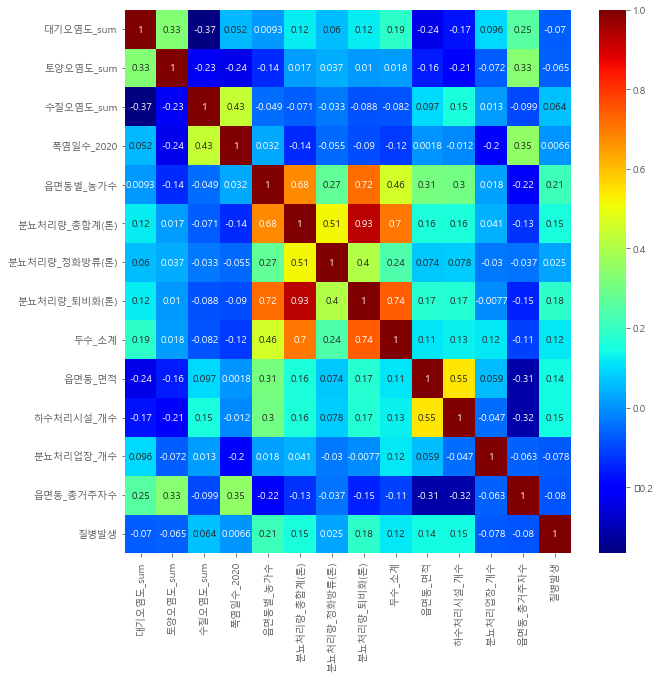

In [50]:
plt.figure(figsize=[10,10])
sns.heatmap(df_cor_시도, annot=True, cmap=plt.cm.jet)
plt.show()

In [51]:
df_cor_시도

,대기오염도_sum,토양오염도_sum,수질오염도_sum,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생
대기오염도_sum,1.000000,0.330380,-0.366686,0.051915,0.009296,0.119442,0.059715,0.119482,0.185988,-0.240775,-0.170995,0.096219,0.254211,-0.069843
토양오염도_sum,0.330380,1.000000,-0.225699,-0.235901,-0.139352,0.017462,0.037208,0.010220,0.017605,-0.160966,-0.208134,-0.072366,0.334771,-0.064720
수질오염도_sum,-0.366686,-0.225699,1.000000,0.434959,-0.049293,-0.071035,-0.032607,-0.087648,-0.081858,0.096672,0.153024,0.013485,-0.099239,0.064071
폭염일수_2020,0.051915,-0.235901,0.434959,1.000000,0.032081,-0.137215,-0.054531,-0.090430,-0.119387,0.001807,-0.012469,-0.197511,0.353615,0.006558
읍면동별_농가수,0.009296,-0.139352,-0.049293,0.032081,1.000000,0.676694,0.271259,0.717911,0.458606,0.308203,0.303104,0.017874,-0.220378,0.210834
분뇨처리량_총합계(톤),0.119442,0.017462,-0.071035,-0.137215,0.676694,1.000000,0.514368,0.925265,0.702583,0.161361,0.158490,0.041163,-0.130146,0.154179
분뇨처리량_정화방류(톤),0.059715,0.037208,-0.032607,-0.054531,0.271259,0.514368,1.000000,0.402942,0.241391,0.073797,0.078140,-0.030440,-0.036985,0.025286
분뇨처리량_퇴비화(톤),0.119482,0.010220,-0.087648,-0.090430,0.717911,0.925265,0.402942,1.000000,0.743205,0.174718,0.169953,-0.007684,-0.149472,0.184570
두수_소계,0.185988,0.017605,-0.081858,-0.119387,0.458606,0.702583,0.241391,0.743205,1.000000,0.109652,0.129298,0.118403,-0.106937,0.117453
읍면동_면적,-0.240775,-0.160966,0.096672,0.001807,0.308203,0.161361,0.073797,0.174718,0.109652,1.000000,0.545779,0.058968,-0.314071,0.143179


In [52]:
df_cor_시도.iloc[:3,3:]

,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),두수_소계,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생
대기오염도_sum,0.051915,0.009296,0.119442,0.059715,0.119482,0.185988,-0.240775,-0.170995,0.096219,0.254211,-0.069843
토양오염도_sum,-0.235901,-0.139352,0.017462,0.037208,0.010220,0.017605,-0.160966,-0.208134,-0.072366,0.334771,-0.064720
수질오염도_sum,0.434959,-0.049293,-0.071035,-0.032607,-0.087648,-0.081858,0.096672,0.153024,0.013485,-0.099239,0.064071


In [53]:
abs(df_cor_시도.iloc[:3,3:]).sum(axis=1)

대기오염도_sum    1.377881
토양오염도_sum    1.298705
수질오염도_sum    1.183891
dtype: float64

> 종속변수로 대기오염도 선정

In [54]:
df = df.drop(columns=['토양오염도_sum', '수질오염도_sum','시군별_수질오염도', '시도별_토양오염도','시군별_토양오염도']).rename(columns={'대기오염도_sum':
                                                                                                '시도별_대기오염도'})
df

,시도별_대기오염도,시군별_대기오염도,시도,시군,읍면동,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),...,두수_한육우,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생
0,20.776917,NaN,서울특별시,종로구,청운효자동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0,0.0
1,20.776917,NaN,서울특별시,종로구,종로1.2.3.4가동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0,0.0
2,20.776917,NaN,서울특별시,종로구,종로5.6가동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0,0.0
3,20.776917,NaN,서울특별시,종로구,창신제1동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0,0.0
4,20.776917,NaN,서울특별시,종로구,창신제2동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,15.426917,15.173917,제주특별자치도,서귀포시,송산동,0.0,7.0,5.56736,0.0,5.567360,...,0.0,0.0,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0,0.0
4119,15.426917,15.173917,제주특별자치도,서귀포시,동홍동,NaN,2.0,0.53280,0.0,0.532800,...,0.0,0.0,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0,0.0
4120,15.426917,15.173917,제주특별자치도,서귀포시,천지동,0.0,6.0,6.31259,0.0,6.312590,...,65.0,0.0,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0,0.0
4121,15.426917,15.173917,제주특별자치도,서귀포시,서홍동,NaN,6.0,6.31259,0.0,6.312590,...,65.0,0.0,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0,0.0


# 2. EDA
- 농가수 대비 두수
- 농가수 대비 처리시설 개수
- 읍면동별_농가수 는 EDA용
- 면적대비 파생변수를 만들어 모델링용 변수 생성

In [324]:
# df_origin.to_excel('파생변수_merged_Basic.xlsx', index=False, encoding='utf-8-sig')

In [55]:
df.columns

Index(['시도별_대기오염도', '시군별_대기오염도', '시도', '시군', '읍면동', '폭염일수_2020', '읍면동별_농가수',
       '분뇨처리량_총합계(톤)', '분뇨처리량_정화방류(톤)', '분뇨처리량_퇴비화(톤)', '두수_소계', '두수_한육우',
       '두수_젖소', '두수_말', '두수_돼지', '두수_닭·오리', '읍면동_면적', '하수처리시설_개수', '분뇨처리업장_개수',
       '읍면동_총거주자수', '질병발생'],
      dtype='object')

In [61]:
대기파생 = pd.read_excel('./Data/독립변수_v4/파생변수_대기오염도.xlsx')
대기파생

,대기오염_파생변수,시도별_대기오염도,시군별_대기오염도,시도,시군,읍면동
0,0.000000,20.776917,NaN,서울특별시,종로구,청운효자동
1,0.000000,20.776917,NaN,서울특별시,종로구,종로1.2.3.4가동
2,0.000000,20.776917,NaN,서울특별시,종로구,종로5.6가동
3,0.000000,20.776917,NaN,서울특별시,종로구,창신제1동
4,0.000000,20.776917,NaN,서울특별시,종로구,창신제2동
...,...,...,...,...,...,...
4118,0.100427,15.426917,15.173917,제주특별자치도,서귀포시,송산동
4119,0.009611,15.426917,15.173917,제주특별자치도,서귀포시,동홍동
4120,0.113870,15.426917,15.173917,제주특별자치도,서귀포시,천지동
4121,0.113870,15.426917,15.173917,제주특별자치도,서귀포시,서홍동


In [63]:
대기파생.drop(columns=['시도별_대기오염도',	'시군별_대기오염도'], inplace=True)

In [66]:
대기파생 = 대기파생.groupby(by=['시도','시군','읍면동']).mean()

In [68]:
df = pd.merge(df, 대기파생, on=['시도','시군','읍면동'], how='left')
df

,시도별_대기오염도,시군별_대기오염도,시도,시군,읍면동,폭염일수_2020,읍면동별_농가수,분뇨처리량_총합계(톤),분뇨처리량_정화방류(톤),분뇨처리량_퇴비화(톤),...,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생,대기오염_파생변수
0,20.776917,NaN,서울특별시,종로구,청운효자동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.417124e+07,0,NaN,12057.0,0.0,0.000000
1,20.776917,NaN,서울특별시,종로구,종로1.2.3.4가동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.350000e+06,0,NaN,6535.0,0.0,0.000000
2,20.776917,NaN,서울특별시,종로구,종로5.6가동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.000000e+05,0,NaN,5050.0,0.0,0.000000
3,20.776917,NaN,서울특별시,종로구,창신제1동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.100000e+05,0,NaN,4821.0,0.0,0.000000
4,20.776917,NaN,서울특별시,종로구,창신제2동,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.600000e+05,0,NaN,8062.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,15.426917,15.173917,제주특별자치도,서귀포시,송산동,0.0,7.0,5.56736,0.0,5.567360,...,0.0,94.0,532.0,0.0,9.854528e+06,0,NaN,4083.0,0.0,0.100427
4119,15.426917,15.173917,제주특별자치도,서귀포시,동홍동,NaN,2.0,0.53280,0.0,0.532800,...,0.0,48.0,0.0,0.0,1.416930e+07,0,NaN,23102.0,0.0,0.009611
4120,15.426917,15.173917,제주특별자치도,서귀포시,천지동,0.0,6.0,6.31259,0.0,6.312590,...,0.0,0.0,1158.0,0.0,7.612721e+06,0,NaN,3445.0,0.0,0.113870
4121,15.426917,15.173917,제주특별자치도,서귀포시,서홍동,NaN,6.0,6.31259,0.0,6.312590,...,0.0,0.0,1158.0,0.0,1.339827e+07,0,NaN,10572.0,0.0,0.113870


In [69]:
df[['시도','대기오염_파생변수']].groupby(by='시도').mean().reset_index().sort_values(by='대기오염_파생변수', ascending=False)

,시도,대기오염_파생변수
0,강원도,1.482019
15,충청남도,1.305044
16,충청북도,1.258727
10,울산광역시,1.217670
3,경상북도,1.062626
12,전라남도,1.062168
6,대전광역시,1.032761
13,전라북도,0.967506
11,인천광역시,0.892453
2,경상남도,0.855179


In [70]:
df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)

,시도,두수_소계
16,충청북도,215949.206897
15,충청남도,215395.378531
1,경기도,173829.664207
13,전라북도,152087.217172
12,전라남도,118277.418182
3,경상북도,108515.562701
14,제주특별자치도,106911.400000
0,강원도,69542.601156
2,경상남도,65593.266409
10,울산광역시,16104.727273


In [71]:
df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)

,시도,두수_소계
16,충청북도,215949.206897
15,충청남도,215395.378531
1,경기도,173829.664207
13,전라북도,152087.217172
12,전라남도,118277.418182
3,경상북도,108515.562701
14,제주특별자치도,106911.400000
0,강원도,69542.601156
2,경상남도,65593.266409
10,울산광역시,16104.727273


In [72]:
df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)['시도']

16       충청북도
15       충청남도
1         경기도
13       전라북도
12       전라남도
3        경상북도
14    제주특별자치도
0         강원도
2        경상남도
10      울산광역시
11      인천광역시
4       광주광역시
5       대구광역시
7       부산광역시
6       대전광역시
8       서울특별시
9     세종특별자치시
Name: 시도, dtype: object

In [73]:
df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)['두수_소계']

16    215949.206897
15    215395.378531
1     173829.664207
13    152087.217172
12    118277.418182
3     108515.562701
14    106911.400000
0      69542.601156
2      65593.266409
10     16104.727273
11     14825.862069
4      10131.238095
5       9870.967742
7       8065.750000
6       3562.440000
8         17.166667
9               NaN
Name: 두수_소계, dtype: float64

In [74]:
df[['시도','두수_소계']].groupby(by='시도').mean().fillna(0)

,두수_소계
시도,
강원도,69542.601156
경기도,173829.664207
경상남도,65593.266409
경상북도,108515.562701
광주광역시,10131.238095
대구광역시,9870.967742
대전광역시,3562.440000
부산광역시,8065.750000
서울특별시,17.166667


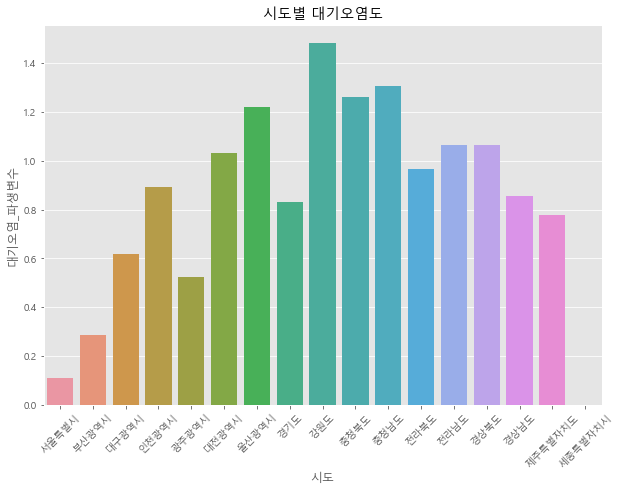

In [75]:
plt.figure(figsize=[10,7])

sns.barplot(x='시도', y='대기오염_파생변수', data=df, ci=False)

plt.title('시도별 대기오염도')
plt.xticks(rotation=45)
plt.show()

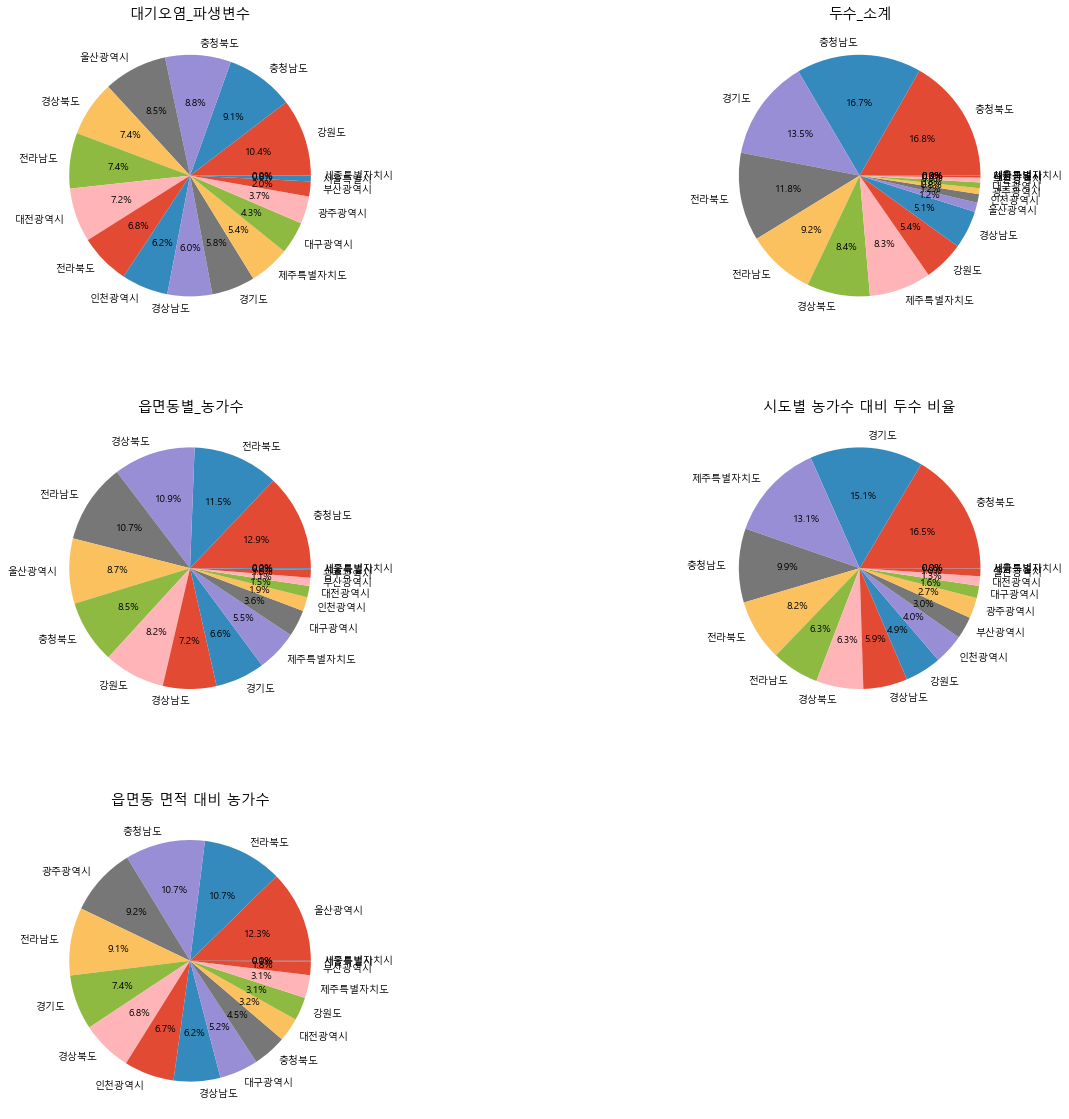

In [76]:
plt.figure(figsize=[20,20])
plt.subplots_adjust(hspace=.3, wspace=.5)

plt.subplot(321)
plt.pie(df[['시도','대기오염_파생변수']].groupby(by='시도').mean().reset_index().sort_values(by='대기오염_파생변수', ascending=False)['대기오염_파생변수'],
       labels=df[['시도','대기오염_파생변수']].groupby(by='시도').mean().reset_index().sort_values(by='대기오염_파생변수', ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('대기오염_파생변수')

plt.subplot(322)
plt.pie(df[['시도','두수_소계']].groupby(by='시도').mean().fillna(0).reset_index().sort_values(by='두수_소계', ascending=False)['두수_소계'],
       labels=df[['시도','두수_소계']].groupby(by='시도').mean().reset_index().sort_values(by='두수_소계', ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('두수_소계')

plt.subplot(323)
plt.pie(df[['시도','읍면동별_농가수']].groupby(by='시도').mean().fillna(0).reset_index().sort_values(by='읍면동별_농가수', ascending=False)['읍면동별_농가수'],
       labels=df[['시도','읍면동별_농가수']].groupby(by='시도').mean().reset_index().sort_values(by='읍면동별_농가수', ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('읍면동별_농가수')

plt.subplot(325)
plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('읍면동 면적 대비 농가수')

plt.subplot(324)
plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().fillna(0).sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')
plt.title('시도별 농가수 대비 두수 비율')
plt.show()



plt.show()

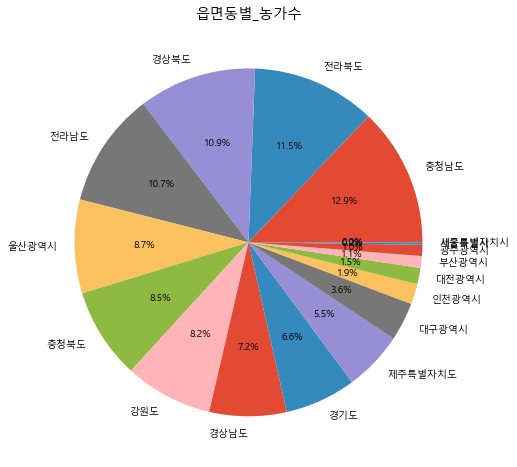

In [77]:
plt.figure(figsize=[8,8])

plt.pie(df[['시도','읍면동별_농가수']].groupby(by='시도').mean().fillna(0).reset_index().sort_values(by='읍면동별_농가수', ascending=False)['읍면동별_농가수'],
       labels=df[['시도','읍면동별_농가수']].groupby(by='시도').mean().reset_index().sort_values(by='읍면동별_농가수', ascending=False)['시도'],
       autopct='%1.1f%%')

plt.title('읍면동별_농가수')
plt.show()

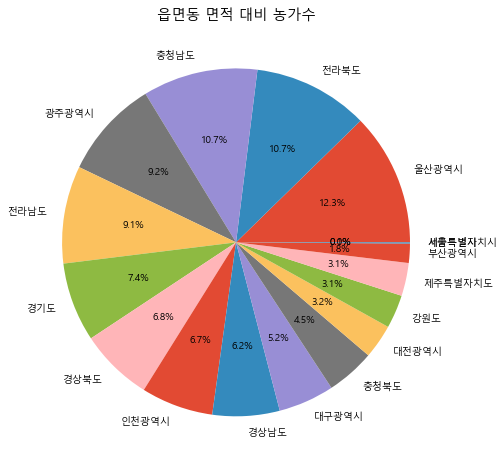

In [78]:
plt.figure(figsize=[8,8])

plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['읍면동별_농가수']/df.groupby(by='시도').sum()['읍면동_면적']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')

plt.title('읍면동 면적 대비 농가수')
plt.show()

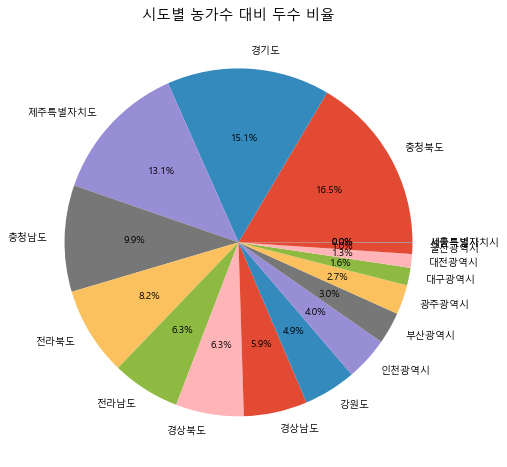

In [79]:
plt.figure(figsize=[8,8])

plt.pie(pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().fillna(0).sort_values(by=0, ascending=False)[0],
       labels=pd.DataFrame(df.groupby(by='시도').sum()['두수_소계']/df.groupby(by='시도').sum()['읍면동별_농가수']).reset_index().sort_values(by=0, ascending=False)['시도'],
       autopct='%1.1f%%')

plt.title('시도별 농가수 대비 두수 비율')
plt.show()

In [80]:
print(len(df.loc[(df['시도']=='충청남도')|(df['시도']=='충청북도')|(df['시도']=='경기도')])
,df.loc[(df['시도']=='충청남도')|(df['시도']=='충청북도')|(df['시도']=='경기도')].isna().sum())

1056 시도별_대기오염도           0
시군별_대기오염도         355
시도                  0
시군                  0
읍면동                 0
폭염일수_2020        1033
읍면동별_농가수          459
분뇨처리량_총합계(톤)      492
분뇨처리량_정화방류(톤)     492
분뇨처리량_퇴비화(톤)      492
두수_소계             492
두수_한육우            492
두수_젖소             492
두수_말              492
두수_돼지             492
두수_닭·오리           492
읍면동_면적             80
하수처리시설_개수           0
분뇨처리업장_개수         994
읍면동_총거주자수         117
질병발생                0
대기오염_파생변수           0
dtype: int64


In [385]:
# df.loc[(df['시도']=='충청남도')|(df['시도']=='충청북도')|(df['시도']=='경기도')].to_excel('Basic_Dataset_충청경기.xlsx', index=False, encoding='utf-8-sig')

In [96]:
df['읍면동별_농가수'].unique()

array([ nan,   3.,   1.,   2.,   5.,   9.,  16.,  36.,  15.,  23.,   7.,
        20.,  50., 129.,   6., 103.,  19.,  24.,  12.,  21.,   4.,  13.,
        79.,  10.,  17.,  60.,  41.,  22.,  44.,  32., 155.,  66.,  14.,
        86.,  82.,  51.,   8.,  39.,  33.,  11.,  18.,  26.,  45.,  31.,
        65.,  47.,  28.,  56.,  75.,  25., 120.,  34., 158., 148.,  27.,
       100.,  96., 279.,  43.,  88., 153., 110.,  70., 157.,  78.,  52.,
        46.,  54.,  53.,  63., 107.,  87.,  38.,  84., 150.,  81., 214.,
       126.,  76.,  68., 106.,  30.,  71., 362., 242., 108., 307.,  42.,
       200., 456., 666., 444., 123., 277., 208., 134.,  67.,  73., 131.,
       104.,  83., 143.,  37.,  57.,  62.,  97., 218., 111., 215., 289.,
       116., 119., 136.,  91., 156., 202., 285., 112., 168., 319., 163.,
       127., 205., 284., 501., 190., 162., 135.,  98., 207., 140., 132.,
       291., 171., 179.,  92., 177., 249., 167., 348., 221., 189., 152.,
        93., 204., 287., 212., 206.,  58.,  95., 14

In [94]:
df[df['시도']=='경상북도']

,대기오염도_sum,토양오염도_sum,수질오염도_sum,시군별_수질오염도,시도별_토양오염도,시군별_토양오염도,시군별_대기오염도,시도,시군,읍면동,...,두수_젖소,두수_말,두수_돼지,두수_닭·오리,읍면동_면적,하수처리시설_개수,분뇨처리업장_개수,읍면동_총거주자수,질병발생,읍면동_new
1339,16.647597,166.8375,231.6,NaN,NaN,NaN,NaN,경상북도,포항시남구,상대동,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,상대
1340,16.647597,166.8375,231.6,NaN,NaN,NaN,NaN,경상북도,포항시남구,제철동,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,제철
1341,16.647597,166.8375,231.6,NaN,NaN,NaN,NaN,경상북도,포항시남구,효곡동,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,효곡
1342,16.647597,166.8375,231.6,NaN,NaN,NaN,NaN,경상북도,포항시남구,대이동,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,0.0,대이
1343,16.647597,166.8375,231.6,NaN,128.01939,128.01939,NaN,경상북도,포항시 북구,양학동,...,NaN,NaN,NaN,NaN,1.986227e+06,0,NaN,17143.0,0.0,양학
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,16.647597,166.8375,231.6,NaN,128.01939,128.01939,11.427083,경상북도,울진군,매화면,...,0.0,0.0,0.0,1021.0,1.018639e+08,3,NaN,2007.0,0.0,매화
3781,16.647597,166.8375,231.6,NaN,128.01939,128.01939,NaN,경상북도,울릉군,울릉군,...,0.0,0.0,0.0,0.0,2.172481e+07,0,NaN,6305.0,0.0,울릉
3782,16.647597,166.8375,231.6,NaN,128.01939,128.01939,NaN,경상북도,울릉군,울릉읍,...,0.0,0.0,0.0,0.0,2.172481e+07,0,NaN,6305.0,0.0,울릉
3783,16.647597,166.8375,231.6,NaN,128.01939,128.01939,NaN,경상북도,울릉군,서면,...,0.0,0.0,0.0,0.0,2.785287e+07,0,NaN,871.0,0.0,서


# 읍면동별 대기오염도 도출

In [176]:
for i in np.arange(5,9):
    df = pd.read_excel(f'./Data/종속변수/2020_대기오염/2020년 {i}월.xlsx')
    
    df = df[df['측정소명'].str[-1] != 1]    #끝글자 1을 포함하지 않는 행만 선택
    df = pd.concat([df[(df['측정소명'].str[-1] == '읍')|(df['측정소명'].str[-1] == '면')|(df['측정소명'].str[-1] == '동')],
                    df[df['측정소명'].str.contains('\)')][df[df['측정소명'].str.contains('\)')]['측정소명'].str[-2] == '읍'], 
                    df[df['측정소명'].str.contains('\)')][df[df['측정소명'].str.contains('\)')]['측정소명'].str[-2] == '면'], 
                    df[df['측정소명'].str.contains('\)')][df[df['측정소명'].str.contains('\)')]['측정소명'].str[-2] == '동']])    
    #'읍','면','동'으로 끝나고 ()안에 읍면동이 있다면 안에서 읍면동으로 끝나는 행만 선텍
    # ex. 상록구(사동)
    # str.contains() 에 \ 는 기호도 문자열로 인식하게 해줌
    
    df = df[['지역','측정소명','SO2', 'CO', 'O3', 'NO2', 'PM10','PM25']].groupby(by=['지역','측정소명']).mean().reset_index()
    df['atmosphere'] = df_5.sum(axis=1)
    # df.to_excel(f'./Data/종속변수/대기오염_{i}월.xlsx', index=False, encoding='utf-8-sig')

C:\Users\User\AppData\Local\Temp\ipykernel_9320\221369804.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['atmosphere'] = df_5.sum(axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_9320\221369804.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['atmosphere'] = df_5.sum(axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_9320\221369804.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['atmosphere'] = df_5.sum(axis=1)
C:\Users\User\AppData\Local\Temp\ipykernel_9320\2

In [113]:
df_5월 = pd.read_excel('./Data/종속변수/2020_대기오염/2020년 5월.xlsx')
df_5월

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2020050101,0.003,0.3,0.038,0.008,34.0,25.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2020050102,0.002,0.3,0.038,0.007,37.0,26.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2020050103,0.003,0.4,0.036,0.009,38.0,29.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2020050104,0.002,0.4,0.037,0.008,43.0,31.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2020050105,0.003,0.4,0.038,0.008,43.0,33.0,서울 중구 덕수궁길 15
...,...,...,...,...,...,...,...,...,...,...,...,...
387619,인천 옹진군,도시대기,831493,영흥,2020053120,0.004,0.3,0.069,0.006,31.0,24.0,인천광역시 옹진군 영흥면 영흥로251번길 90
387620,인천 옹진군,도시대기,831493,영흥,2020053121,0.004,0.3,0.066,0.006,32.0,24.0,인천광역시 옹진군 영흥면 영흥로251번길 90
387621,인천 옹진군,도시대기,831493,영흥,2020053122,0.004,0.3,0.060,0.007,34.0,28.0,인천광역시 옹진군 영흥면 영흥로251번길 90
387622,인천 옹진군,도시대기,831493,영흥,2020053123,0.004,0.3,0.056,0.006,29.0,22.0,인천광역시 옹진군 영흥면 영흥로251번길 90


In [114]:
df_5월 = df_5월[(df_5월['측정소명'].str[-1] == '읍')|(df_5월['측정소명'].str[-1] == '면')|(df_5월['측정소명'].str[-1] == '동')]
df_5월

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
29760,경기 수원시,도시대기,131111,신풍동,2020050101,0.001,0.6,0.050,0.006,NaN,22.0,경기 수원시 팔달구 신풍로 23번길 68
29761,경기 수원시,도시대기,131111,신풍동,2020050102,0.001,0.6,0.054,0.005,NaN,22.0,경기 수원시 팔달구 신풍로 23번길 68
29762,경기 수원시,도시대기,131111,신풍동,2020050103,0.001,0.6,0.056,0.004,56.0,24.0,경기 수원시 팔달구 신풍로 23번길 68
29763,경기 수원시,도시대기,131111,신풍동,2020050104,0.001,0.6,0.056,0.004,46.0,24.0,경기 수원시 팔달구 신풍로 23번길 68
29764,경기 수원시,도시대기,131111,신풍동,2020050105,0.001,0.6,0.053,0.004,44.0,23.0,경기 수원시 팔달구 신풍로 23번길 68
...,...,...,...,...,...,...,...,...,...,...,...,...
382411,경기 부천시,도시대기,831154,오정동,2020053120,0.005,0.4,0.062,0.012,35.0,36.0,경기 부천시 성오로 172
382412,경기 부천시,도시대기,831154,오정동,2020053121,0.005,0.4,0.062,0.012,28.0,30.0,경기 부천시 성오로 172
382413,경기 부천시,도시대기,831154,오정동,2020053122,0.004,0.4,0.058,0.009,36.0,37.0,경기 부천시 성오로 172
382414,경기 부천시,도시대기,831154,오정동,2020053123,0.004,0.3,0.052,0.009,30.0,30.0,경기 부천시 성오로 172


In [119]:
df_5 = df_5월[['지역','측정소명','SO2', 'CO', 'O3', 'NO2', 'PM10','PM25']].groupby(by=['지역','측정소명']).mean().reset_index()
df_5

,지역,측정소명,SO2,CO,O3,NO2,PM10,PM25
0,강원 강릉시,옥천동,0.002592,0.458095,0.042245,0.011095,31.867568,11.902405
1,강원 고성군,간성읍,0.000535,0.194897,0.042759,0.002557,27.857534,11.150628
2,강원 동해시,천곡동,0.001560,0.353731,0.031510,0.011360,26.679783,13.716196
3,강원 삼척시,남양동,0.001754,0.308796,0.032992,0.008962,28.074425,12.358357
4,강원 속초시,금호동,0.003148,0.416038,0.044651,0.006019,33.029650,10.527100
...,...,...,...,...,...,...,...,...
365,충북 청주시,용암동,0.003946,0.446176,0.035680,0.014089,34.945038,14.382530
366,충북 충주시,살미면,0.003291,0.312195,0.037511,0.009615,33.374317,15.364499
367,충북 충주시,중앙탑면,0.002388,0.253108,0.044634,0.007797,35.531800,16.520270
368,충북 충주시,칠금동,0.003133,0.428494,0.030863,0.015841,38.057103,18.032520


In [124]:
df_5['atmosphere'] = df_5.sum(axis=1)
df_5

C:\Users\User\AppData\Local\Temp\ipykernel_9320\4165982531.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_5['atmosphere'] = df_5.sum(axis=1)


,지역,측정소명,SO2,CO,O3,NO2,PM10,PM25,atmosphere
0,강원 강릉시,옥천동,0.002592,0.458095,0.042245,0.011095,31.867568,11.902405,44.283999
1,강원 고성군,간성읍,0.000535,0.194897,0.042759,0.002557,27.857534,11.150628,39.248909
2,강원 동해시,천곡동,0.001560,0.353731,0.031510,0.011360,26.679783,13.716196,40.794141
3,강원 삼척시,남양동,0.001754,0.308796,0.032992,0.008962,28.074425,12.358357,40.785285
4,강원 속초시,금호동,0.003148,0.416038,0.044651,0.006019,33.029650,10.527100,44.026606
...,...,...,...,...,...,...,...,...,...
365,충북 청주시,용암동,0.003946,0.446176,0.035680,0.014089,34.945038,14.382530,49.827458
366,충북 충주시,살미면,0.003291,0.312195,0.037511,0.009615,33.374317,15.364499,49.101428
367,충북 충주시,중앙탑면,0.002388,0.253108,0.044634,0.007797,35.531800,16.520270,52.359997
368,충북 충주시,칠금동,0.003133,0.428494,0.030863,0.015841,38.057103,18.032520,56.567954


In [136]:
df_5.to_excel('./Data/종속변수/대기오염_5월.xlsx', index=False, encoding='utf-8-sig')

In [147]:
df_5월[df_5월['측정소명'].str.contains('\(')]

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소


In [153]:
df_6월[df_6월['측정소명'].str.contains('\)')]

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
32400,경기 수원시,도로변대기,131116,경수대로(동수원),2020060101,0.002,0.6,0.045,0.007,27.0,13.0,경기 수원시 팔달구 인계동 1047
32401,경기 수원시,도로변대기,131116,경수대로(동수원),2020060102,0.002,0.5,0.042,0.009,18.0,6.0,경기 수원시 팔달구 인계동 1047
32402,경기 수원시,도로변대기,131116,경수대로(동수원),2020060103,0.002,0.6,0.043,0.007,22.0,12.0,경기 수원시 팔달구 인계동 1047
32403,경기 수원시,도로변대기,131116,경수대로(동수원),2020060104,0.001,0.5,0.041,0.010,18.0,13.0,경기 수원시 팔달구 인계동 1047
32404,경기 수원시,도로변대기,131116,경수대로(동수원),2020060105,0.002,0.5,0.040,0.010,16.0,10.0,경기 수원시 팔달구 인계동 1047
...,...,...,...,...,...,...,...,...,...,...,...,...
374044,경기 부천시,도로변대기,831155,송내대로(중동),2020063020,0.003,0.2,0.035,0.012,6.0,0.0,경기 부천시 송내대로 262
374045,경기 부천시,도로변대기,831155,송내대로(중동),2020063021,0.003,0.2,0.027,0.022,6.0,1.0,경기 부천시 송내대로 262
374046,경기 부천시,도로변대기,831155,송내대로(중동),2020063022,0.003,0.3,0.023,0.023,9.0,2.0,경기 부천시 송내대로 262
374047,경기 부천시,도로변대기,831155,송내대로(중동),2020063023,0.003,0.3,0.022,0.020,6.0,4.0,경기 부천시 송내대로 262


In [ ]:
df_6월['측정소명'].str[-2]

0         중
1         중
2         중
3         중
4         중
         ..
378748    울
378749    울
378750    울
378751    울
378752    울
Name: 측정소명, Length: 378753, dtype: object

In [324]:
error_position = df_6월[df_6월['측정소명'].str.contains('\(')]['측정소명'].str.find('(')-1.

In [325]:
error_position = error_position.to_list()

In [326]:
li = df_6월[df_6월['측정소명'].str.contains('\(')]['측정소명'].to_list()
for i in range(len(li)):
    print(li[i][error_position[i]])

TypeError: string indices must be integers

In [179]:
df_6월[df_6월['측정소명'].str.contains('\(')]['측정소명'].unique()

array(['경수대로(동수원)', '호매실동(폐쇄)', '대왕판교로(백현동)', '성남대로(모란역)', '중앙대로(고잔동)',
       '백마로(마두역)', '중부대로(구갈동)', '금암로(신장동)', '중앙동(경기)', '부곡동(울산)',
       '여천동(울산)', '상대동(진주)', '송정1동(폐쇄)', '여천동(여수)', '중동(유해+중금속)',
       '진상면(폐쇄)', '노원동(폐쇄)', '지품면(폐쇄)', '안계면(교외)', '상대동(대전)', '송정동(봉명동)',
       '중앙동(강원)', '반곡동(명륜동)', '신풍동(군산)', '송내대로(중동)'], dtype=object)

In [180]:
pd.concat([df_6월[(df_5월['측정소명'].str[-1] == '읍')|(df_6월['측정소명'].str[-1] == '면')|(df_6월['측정소명'].str[-1] == '동')],
          df_6월[df_6월['측정소명'].str.contains('\)')][df_6월[df_6월['측정소명'].str.contains('\)')]['측정소명'].str[-2] == '읍'], 
          df_6월[df_6월['측정소명'].str.contains('\)')][df_6월[df_6월['측정소명'].str.contains('\)')]['측정소명'].str[-2] == '면'], 
          df_6월[df_6월['측정소명'].str.contains('\)')][df_6월[df_6월['측정소명'].str.contains('\)')]['측정소명'].str[-2] == '동']])

C:\Users\User\AppData\Local\Temp\ipykernel_9320\3383718569.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.concat([df_6월[(df_5월['측정소명'].str[-1] == '읍')|(df_6월['측정소명'].str[-1] == '면')|(df_6월['측정소명'].str[-1] == '동')],


,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
28800,경기 수원시,도시대기,131111,신풍동,2020060101,0.001,0.4,0.052,0.006,18.0,16.0,경기 수원시 팔달구 신풍로 23번길 68
28801,경기 수원시,도시대기,131111,신풍동,2020060102,0.001,0.4,0.052,0.005,15.0,15.0,경기 수원시 팔달구 신풍로 23번길 68
28802,경기 수원시,도시대기,131111,신풍동,2020060103,0.001,0.5,0.052,0.005,20.0,14.0,경기 수원시 팔달구 신풍로 23번길 68
28803,경기 수원시,도시대기,131111,신풍동,2020060104,0.001,0.4,0.052,0.005,22.0,16.0,경기 수원시 팔달구 신풍로 23번길 68
28804,경기 수원시,도시대기,131111,신풍동,2020060105,0.001,0.4,0.051,0.005,17.0,15.0,경기 수원시 팔달구 신풍로 23번길 68
...,...,...,...,...,...,...,...,...,...,...,...,...
374044,경기 부천시,도로변대기,831155,송내대로(중동),2020063020,0.003,0.2,0.035,0.012,6.0,0.0,경기 부천시 송내대로 262
374045,경기 부천시,도로변대기,831155,송내대로(중동),2020063021,0.003,0.2,0.027,0.022,6.0,1.0,경기 부천시 송내대로 262
374046,경기 부천시,도로변대기,831155,송내대로(중동),2020063022,0.003,0.3,0.023,0.023,9.0,2.0,경기 부천시 송내대로 262
374047,경기 부천시,도로변대기,831155,송내대로(중동),2020063023,0.003,0.3,0.022,0.020,6.0,4.0,경기 부천시 송내대로 262
